In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb
wandb.login()
#68d141a84e46b2c24e84d088688d602d3308c683

True

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm
import scipy.io

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm
import scipy.io
from torchvision import datasets
from torch.utils.data import Dataset
import PIL
from PIL import Image

In [ ]:
device = torch.device('cpu')

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')

In [ ]:
print(device)

cpu


In [ ]:
image_path = "/content/drive/MyDrive/cv2023/VOC_Segmentation_Dataset/images"

In [ ]:
masks_path = "/content/drive/MyDrive/cv2023/VOC_Segmentation_Dataset/masks"

In [ ]:
config ={
    'epochs' : 10,
    'classes' : 21,
    'learning_rate' : 0.001,
    'momentum' : 0.9,
    'batch_size': 10
}

In [ ]:
import os

In [ ]:
images_list = os.listdir(image_path)

In [ ]:
print(len(images_list))

1464


In [ ]:
masks_list = os.listdir(masks_path)

In [ ]:
print(len(masks_list))

1464


In [ ]:
images_list.sort()
masks_list.sort()

In [ ]:
print(images_list)

['2007_000032.jpg', '2007_000039.jpg', '2007_000063.jpg', '2007_000068.jpg', '2007_000121.jpg', '2007_000170.jpg', '2007_000241.jpg', '2007_000243.jpg', '2007_000250.jpg', '2007_000256.jpg', '2007_000333.jpg', '2007_000363.jpg', '2007_000364.jpg', '2007_000392.jpg', '2007_000480.jpg', '2007_000504.jpg', '2007_000515.jpg', '2007_000528.jpg', '2007_000549.jpg', '2007_000584.jpg', '2007_000645.jpg', '2007_000648.jpg', '2007_000713.jpg', '2007_000720.jpg', '2007_000733.jpg', '2007_000738.jpg', '2007_000768.jpg', '2007_000793.jpg', '2007_000822.jpg', '2007_000836.jpg', '2007_000876.jpg', '2007_000904.jpg', '2007_001027.jpg', '2007_001073.jpg', '2007_001149.jpg', '2007_001185.jpg', '2007_001225.jpg', '2007_001340.jpg', '2007_001397.jpg', '2007_001416.jpg', '2007_001420.jpg', '2007_001439.jpg', '2007_001487.jpg', '2007_001595.jpg', '2007_001602.jpg', '2007_001609.jpg', '2007_001698.jpg', '2007_001704.jpg', '2007_001709.jpg', '2007_001724.jpg', '2007_001764.jpg', '2007_001825.jpg', '2007_00183

In [ ]:
print(masks_list)

['2007_000032.png', '2007_000039.png', '2007_000063.png', '2007_000068.png', '2007_000121.png', '2007_000170.png', '2007_000241.png', '2007_000243.png', '2007_000250.png', '2007_000256.png', '2007_000333.png', '2007_000363.png', '2007_000364.png', '2007_000392.png', '2007_000480.png', '2007_000504.png', '2007_000515.png', '2007_000528.png', '2007_000549.png', '2007_000584.png', '2007_000645.png', '2007_000648.png', '2007_000713.png', '2007_000720.png', '2007_000733.png', '2007_000738.png', '2007_000768.png', '2007_000793.png', '2007_000822.png', '2007_000836.png', '2007_000876.png', '2007_000904.png', '2007_001027.png', '2007_001073.png', '2007_001149.png', '2007_001185.png', '2007_001225.png', '2007_001340.png', '2007_001397.png', '2007_001416.png', '2007_001420.png', '2007_001439.png', '2007_001487.png', '2007_001595.png', '2007_001602.png', '2007_001609.png', '2007_001698.png', '2007_001704.png', '2007_001709.png', '2007_001724.png', '2007_001764.png', '2007_001825.png', '2007_00183

In [ ]:
x_train = images_list[0:1025]
x_val = images_list[1025:1319]
x_test = images_list[1319:]

In [ ]:
y_train = masks_list[0:1025]
y_val = masks_list[1025:1319]
y_test = masks_list[1319:]

In [ ]:
print(len(y_train))
print(len(y_val))
print(len(y_test))

1025
294
145


In [ ]:
voc_colormap = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],[0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],[64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],[64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
        [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0], [0, 64, 128]]
voc_classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus','car', 'cat', 'chair', 'cow', 'dining table', 'dog', 'horse', 'motorbike','person', 'potted plant', 'sheep', 'sofa', 'train', 'tv monitor']

In [ ]:
counts = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(counts))


21


In [ ]:
mask = Image.open(masks_path +'/'+ masks_list[5])
mask = (np.array(mask))
print(mask)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [15 15 15 ...  0  0  0]
 [15 15 15 ...  0  0  0]
 [15 15 15 ...  0  0  0]]


In [ ]:
mask = cv2.imread(masks_path +'/'+ masks_list[5])
print(mask.shape)
mask = cv2.resize(mask, (320, 320))
output_mask = []
for i, color in enumerate(voc_colormap):
  cmap = np.all(np.equal(mask, color), axis=-1)
  output_mask.append(cmap)
  # print(np.all(np.equal(mask, color), axis=-1))
  # print(cmap)
  if(np.all(np.array_equal(mask, color), axis=-1)):
    counts[i]+=1
output_mask = np.stack(output_mask, axis=-1)
grayscale_mask = np.argmax(output_mask, axis=-1)
print(grayscale_mask.shape)
grayscale_mask = (grayscale_mask / len(voc_classes)) * 255
print(grayscale_mask.shape)
grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)
print(grayscale_mask.shape)

(375, 500, 3)
(320, 320)
(320, 320)
(320, 320, 1)


In [ ]:
# print(masks_path +'/'+ masks_list[5])
# mask = cv2.imread(masks_path +'/'+ masks_list[5],cv2.IMREAD_COLOR)
mask = Image.open(masks_path +'/'+ masks_list[5])
mask = (np.array(mask))
print(mask.shape)
# mask = cv2.resize(mask, (320, 320, 3))
mask = np.resize(mask,(320, 320, 3))
# print(mask)
height, width = mask.shape[0],mask.shape[1]
seg_mask = np.zeros((height, width, 21), dtype=np.float32)
for label_idx, label in enumerate(voc_colormap):
  print(label)
  print(mask[:,:,])
  seg_mask[:, :, label_idx] = np.all(np.equal(mask , label), axis=-1).astype(float)
  print(np.array_equal(mask , label))
  if(np.array_equal(mask[:,:,] , label)):
    counts[label_idx]+=1
print(counts)
grayscale_mask = np.argmax(processed_mask, axis=-1)
grayscale_mask = (grayscale_mask / len(VOC_CLASSES)) * 255
grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)

(375, 500)
[0, 0, 0]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]]
False
[128, 0, 0]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]

 [[

NameError: ignored

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataset ,masks_list, n_samples,transform = None):
        self.dataset = dataset
        self.masks_list = masks_list
        self.images_list = images_list
        self.n_samples = n_samples
        self.transform = transform
        #self.m_transform = m_transform

    def __len__(self):
      return len(self.dataset)

    def plotImage(self,idx):
       return Image.open(image_path +'/'+ self.dataset[idx])

    def plotMask(self,idx):
       return Image.open(masks_path +'/'+ self.masks_list[idx])

    def __getitem__(self, idx):
      # img = Image.open(image_path +'/'+ self.dataset[idx])
      # mask = Image.open(masks_path +'/'+ self.masks_list[idx])
      img = cv2.imread(image_path +'/'+ self.dataset[idx])
      mask = cv2.imread(masks_path +'/'+ self.masks_list[idx])
      # print(mask.shape)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img,(256,256))
      mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
      mask = cv2.resize(mask,(256,256))
      
      if self.transform !=None:
        img = np.array(self.transform(img))
        mask = np.array(self.transform(mask))
      # print(mask.shape)
      height, width = mask.shape[0],mask.shape[1]
      # print(height, width)
      seg_mask = np.zeros((height, width, 21), dtype=np.float32)
      # print(mask.shape)
      for label_idx, label in enumerate(voc_colormap):
        seg_mask[:, :, label_idx] = np.all(np.array_equal(mask , label), axis=-1).astype(float)
      mask = seg_mask
      # print(mask.shape)
      mask=torch.tensor(mask).float()
      mask=torch.tensor(mask).float()
      return img,mask


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataset ,masks_list, n_samples,transform = None):
        self.dataset = dataset
        self.masks_list = masks_list
        self.images_list = images_list
        self.n_samples = n_samples
        self.transform = transform
        #self.m_transform = m_transform

    def __len__(self):
      return len(self.dataset)

    def plotImage(self,idx):
       return Image.open(image_path +'/'+ self.dataset[idx])

    def plotMask(self,idx):
       return Image.open(masks_path +'/'+ self.masks_list[idx])

    def __getitem__(self, idx):
      # img = Image.open(image_path +'/'+ self.dataset[idx])
      # mask = Image.open(masks_path +'/'+ self.masks_list[idx])
      img = cv2.imread(image_path +'/'+ self.dataset[idx])
      mask = cv2.imread(masks_path +'/'+ self.masks_list[idx])
      img = cv2.resize(img,(255,255))
      # if self.transform !=None:
      #   img = np.array(self.transform(img))
      #   mask = np.array(self.transform(mask))
      mask = cv2.resize(mask, (255, 255))
      height, width = mask.shape[0],mask.shape[1]
      seg_mask = np.zeros((height, width, 21), dtype=np.float32)
      # print(mask.shape)
      for label_idx, label in enumerate(voc_colormap):
        seg_mask[:, :, label_idx] = np.all(np.array_equal(mask , label), axis=-1).astype(float)
      mask = seg_mask
      # output_mask = []
      # for i, color in enumerate(voc_colormap):
      #   cmap = np.all(np.equal(mask, color), axis=-1)
      #   output_mask.append(cmap)
      # output_mask = np.stack(output_mask, axis=-1)
      grayscale_mask = np.argmax(seg_mask, axis=-1)
      print(grayscale_mask.shape)
      grayscale_mask = (grayscale_mask / len(voc_classes)) * 255
      print(grayscale_mask.shape)
      # grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)
      # print(grayscale_mask.shape)
      return img,grayscale_mask


In [ ]:
mask = cv2.imread(masks_path +'/'+ masks_list[6])
print(mask.shape)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
mask = cv2.resize(mask,(256,256))
print(mask.shape)
mask = np.array(transform(mask))
height, width = mask.shape[0],mask.shape[1]
print(height, width)
seg_mask = np.zeros((height, width, 21), dtype=np.float32)
print(mask.shape)
for label_idx, label in enumerate(voc_colormap):
  # print(mask[:, :, i])
  # print(np.array_equal(mask , label))
  # print((mask == label))
  seg_mask[:, :, label_idx] = np.all(np.array_equal(mask , label), axis=-1).astype(float)
  # print(mask[:, :, i])
mask = seg_mask
print(mask.shape)
mask=torch.tensor(mask).float()



In [ ]:

# class CustomDataset(Dataset):
#     def __init__(self, dataset ,masks_list, n_samples,transform = None):
#         self.dataset = dataset
#         self.masks_list = masks_list
#         self.images_list = images_list
#         self.n_samples = n_samples
#         self.transform = transform
#         #self.m_transform = m_transform

#     def __len__(self):
#       return len(self.dataset)

#     def plotImage(self,idx):
#       img = Image.open(image_path +'/'+ self.dataset[idx])
#       if self.transform !=None:
#         img = self.transform(img)
#       return img

#     def plotMask(self,idx):
#       mask = Image.open(masks_path +'/'+ self.masks_list[idx])
#       # processed_mask = process_mask(mask)
#       grayscale_mask = np.argmax(mask, axis=-1)
#       grayscale_mask = (grayscale_mask / 21) * 255
#       grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)
#       if self.transform !=None:
#         mask = self.transform(mask)
#       return mask

#     def __getitem__(self, idx):
#       img = Image.open(image_path +'/'+ self.dataset[idx])
#       mask = Image.open(masks_path +'/'+ self.masks_list[idx])
#       # processed_mask = process_mask(mask)
#       grayscale_mask = np.argmax(mask, axis=-1)
#       grayscale_mask = (grayscale_mask / 21) * 255
#       grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)
#       if self.transform !=None:
#         img = self.transform(img)
#         mask = self.transform(mask)
#       return img,mask


In [ ]:
# transform = transforms.Compose([transforms.Resize(255),
#                                 transforms.CenterCrop(224),
#                                 transforms.ToTensor()])

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

In [ ]:
dataset1 = CustomDataset(x_train ,y_train, len(x_train),transform=transform)
dataset2 = CustomDataset(x_val ,y_val, len(x_val),transform=transform)
dataset3 = CustomDataset(x_test ,y_test, len(x_test),transform=transform)

In [ ]:
train_dl = torch.utils.data.DataLoader(dataset = dataset1, batch_size=1, shuffle=False,drop_last = True)
val_dl = torch.utils.data.DataLoader(dataset = dataset2, batch_size=1, shuffle=False,drop_last = True)
test_dl = torch.utils.data.DataLoader(dataset = dataset3, batch_size=1, shuffle=False,drop_last = True)

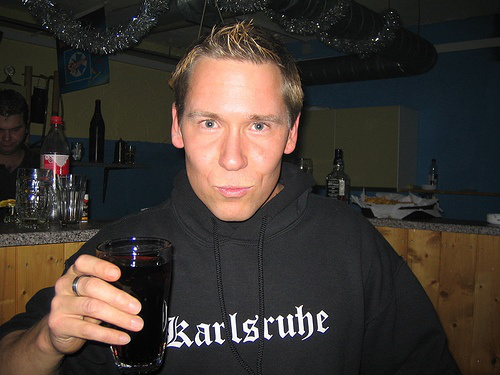

In [ ]:
dataset1.plotImage(5)

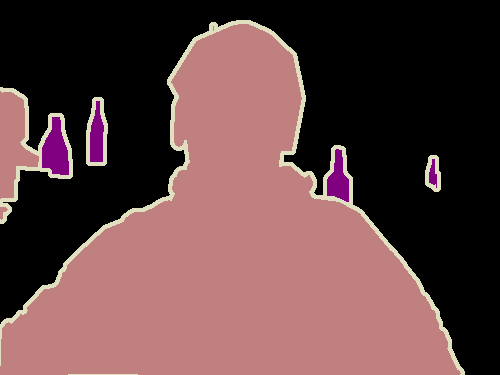

In [ ]:
dataset1.plotMask(5)

In [ ]:
  for epoch in range(10):
      n_total_steps = len(train_dl)
      example_ct=0;batch_ct=0;
      train_loss = 0;train_acc=0
      valid_loss=0;valid_acc=0
      labels_arr=[];outputs_arr=[]
      labels_val=[];outputs_val=[]
      train_correct = 0;
      lab_dict = {}

      for i,(img,mask) in enumerate(train_dl):
          # origin shape: [4, 3, 32, 32] = 4, 3, 1024
          # input_layer: 3 input channels, 6 output channels, 5 kernel size
          # print(img.shape)
          # print("**************************************")
          # print(i)
          # print(mask.shape)
          # dataset1.plotMask(i)
          # print("**************************************")
          break

(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)
(255, 255)


In [ ]:
%pip install segmentation_models_pytorch 

In [ ]:
import torchvision
import numpy
import torch
import argparse
import cv2
from PIL import Image

In [ ]:
import torchvision.models as models

In [ ]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam

In [ ]:
# weights = FCN_ResNet50_Weights.DEFAULT
# transforms = weights.transforms(resize_size=None)

# model = fcn_resnet50(weights=weights, progress=False)


In [ ]:
weights = FCN_ResNet50_Weights.DEFAULT
transforms = weights.transforms(resize_size=None)

model = fcn_resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.fc = Linear(in_features=255, out_features=21)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

In [ ]:
from timeit import default_timer as timer

In [ ]:
myconfig ={
    'epochs' : 5,
    'learning_rate' : 0.001,
    'momentum' : 0.9,
    'batch_size': 100
}

In [ ]:
num_epochs=5

In [ ]:
import numpy as np
cm2lbl=np.zeros(256**3)
for i,cm in enumerate(voc_colormap):
    cm2lbl[(cm[0]*256+cm[1])*256+cm[2]]=i

def image2label(im):
    data=np.array(im,dtype='int32')
    idx=(data[:,:,0]*256+data[:,:,1])*256+data[:,:,2]
    return np.array(cm2lbl[idx],dtype='int64')

In [ ]:
from PIL import Image
label_im = Image.open( masks_path + '/2007_000032.png').convert('RGB')
label_im.show()
label = image2label(label_im)
label[150:160, 240:250]

In [ ]:
from PIL import Image
label_im = Image.open('./VOCdevkit/VOC2012/SegmentationClass/2007_000033.png').convert('RGB')
label_im.show()
label = image2label(label_im)
label[150:160, 240:250]

In [101]:
config = myconfig  
ta_p = []
tl_p = []
va_p = []
vl_p = []
import torch.nn.functional as F
n_total_steps = len(train_dl)
example_ct=0;batch_ct=0;
train_loss = 0;train_acc=0
valid_loss=0;valid_acc=0
labels_arr=[];outputs_arr=[]
labels_val=[];outputs_val=[]
train_correct = 0;
train_total = 0;
example_ct = 0 
batch_ct = 0
val_correct = 0
val_total = 0;
val_loss = 0.0
for epoch in range(num_epochs):
    # with wandb.init(project="cva1q2", config=config):
    #   config = wandb.config
    #   wandb.watch(model)
      starts = timer()
      for i, data in enumerate(train_dl,0):
          images,labels=data
          optimizer.zero_grad()
          print(images.shape)
          images = images.permute(0, 3, 1, 2)
          outputs = model(images.float())
          ps=timer()
          starts=ps
          print(images.shape)
          print(outputs['out'].shape)
          #op = F.log_softmax(outputs['out'], dim=1)
          print(labels.shape)
          labels = labels.type(torch.LongTensor)
          print(labels.squeeze().unique())
          loss = criterion(outputs['out'], labels)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
          _, predicted = torch.max(outputs['out'], 1)
          train_correct += (predicted == labels).sum().item()
          train_total += len(labels)
          ps=timer()
          starts=ps
          
      with torch.no_grad():
          ps=timer()
          starts=ps
          model.eval()
          for jj,(data, target) in enumerate(val_dl):
              inputs, labels = data,target
              images = inputs.permute(0, 3, 1, 2)
              outputs = model(inputs.float())
              ps=timer()
              starts=ps
              loss = criterion(outputs['out'], labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs['out'], 1)
              val_correct += (predicted == labels).sum().item()
              val_total += len(labels)
              ps=timer()
              starts=ps
      print("final values for epoch={} train_loss={} train_acc={} valid_loss={} valid_acc={}".format(epoch,train_loss/train_total,train_correct/train_total,val_loss/val_total,val_correct/val_total))
      ta_p.append(train_correct/train_total)
      tl_p.append(train_loss/train_total)
      va_p.append(val_correct/val_total)
      vl_p.append(val_loss/val_total)
      # with wandb.init(project="cva1q2", config=config):
      #   config = wandb.config
      #   wandb.log(
      #       {"Train_accuracy" : train_correct/train_total, "Val_accuracy" : val_correct/val_total , "Train_loss":train_loss/train_total, "Val_loss": val_loss/val_total}
      #       )

Streaming output truncated to the last 5000 lines.
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size([1, 3, 255, 255])
torch.Size([1, 21, 255, 255])
torch.Size([1, 255, 255])
tensor([0])
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size([1, 3, 255, 255])
torch.Size([1, 21, 255, 255])
torch.Size([1, 255, 255])
tensor([0])
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size([1, 3, 255, 255])
torch.Size([1, 21, 255, 255])
torch.Size([1, 255, 255])
tensor([0])
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size([1, 3, 255, 255])
torch.Size([1, 21, 255, 255])
torch.Size([1, 255, 255])
tensor([0])
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size([1, 3, 255, 255])
torch.Size([1, 21, 255, 255])
torch.Size([1, 255, 255])
tensor([0])
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size([1, 3, 255, 255])
torch.Size([1, 21, 255, 255])
torch.Size([1, 255, 255])
tensor([0])
(255, 255)
(255, 255)
torch.Size([1, 255, 255, 3])
torch.Size

RuntimeError: ignored

In [ ]:
def visualizeData(data_loader):
  mxA = 0
  mnA = 500000
  mxB = 0
  mnB = 500000
  freq = dict()
  cnt = 0
  for i, data in enumerate(data_loader, 0):
      inputs, masks = data
      mxA = max(mxA, inputs.shape[2])
      mxB = max(mxB, inputs.shape[3])
      mnA = min(mnA, inputs.shape[2])
      mnB = min(mnB, inputs.shape[3])
      masks = np.array(masks) #1x1x500x300
      cnt += masks.shape[0]
      for k in range(masks.shape[0]):
        for i in range(masks.shape[1]):
          for j in range(masks.shape[2]):
            if masks[k,i,j] == 0 :
              continue;
            if masks[k,i,j] not in freq.keys():
              freq[masks[k,i,j]] = 0
            freq[masks[k,i,j]] += 1


  print(cnt,mxA,mnA,mxB,mnB)
  print(freq)
  fig = plt.figure(figsize =(10, 7))
  plt.bar(range(len(freq)), freq.values(), align='center')
  plt.xticks(range(len(freq)), list(freq.keys()))
  plt.show()